# Matplotlib line plot

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymssql

# 한글 처리
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

Duplicate key in file WindowsPath('c:/Users/gik_k/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  Malgun Gothic')
Duplicate key in file WindowsPath('c:/Users/gik_k/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 414 ('axes.unicode_minus: False')


## 데이터 준비

In [3]:
sql_query = '''SELECT MovieID, Title, KoreanTitle, ReleaseYear, RunningTime, BoxOfficeWWGross, BoxOfficeUSGross, Budget
FROM Movie
WHERE Budget <> 0'''

conn = pymssql.connect(
    server='127.0.0.1:1433',
    user='sa',
    password='P@ssw0rd',
    database='DatamotionMovieDatabase',
)  

try:
    cursor = conn.cursor()
    cursor.execute(sql_query)

    result = cursor.fetchall()
except Exception as e:
    print(e)
finally:
    conn.close()

df = pd.DataFrame(result)
df.columns = ['movie_id','title','korean_title','release_year','running_time','boxoffice_ww_gross','boxoffice_us_gross','budget']

In [8]:
df

,movie_id,title,korean_title,release_year,running_time,boxoffice_ww_gross,boxoffice_us_gross,budget
0,1,Whiplash,위플래쉬,2014,107,33020729,13092000,3300000
1,2,Birdman: Or (The Unexpected Virtue of Ignorance),버드맨,2014,119,103215094,42335698,22000000
2,3,American Sniper,아메리칸 스나이퍼,2014,132,547426372,350126372,58800000
3,4,Boyhood,보이후드,2014,165,43237465,25359200,4000000
4,5,The Imitation Game,이미테이션 게임,2014,114,219979959,91121452,14000000
...,...,...,...,...,...,...,...,...
1917,13739,Bullet Train,불릿 트레인,2022,127,77347703,44947703,85900000
1918,13742,Black Panther: Wakanda Forever,블랙 팬서: 와칸다 포에버,2022,161,250000000,453829060,859208836
1919,13743,Everything Everywhere All at Once,에브리씽 에브리웨어 올 앳 원스,2022,129,143370485,77191785,14300000
1920,13744,Elvis,엘비스,2022,159,288670284,151040048,85000000


## 기본 차트 그리기

In [4]:
# 연도별 흥행수익
df_year_ww = df[['release_year','boxoffice_ww_gross']].groupby('release_year').sum()
df_year_ww

,boxoffice_ww_gross
release_year,
1925,26916
1927,0
1931,12098
1933,1600
1934,5418
...,...
2018,18791314573
2019,20530171648
2020,1061012481


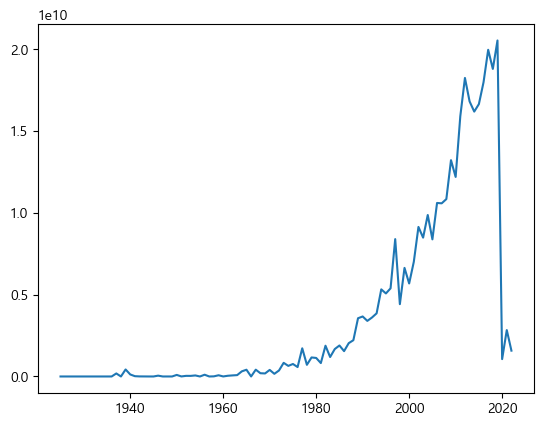

In [5]:
plt.plot(df_year_ww)

## 차트 제목과 축 이름 추가

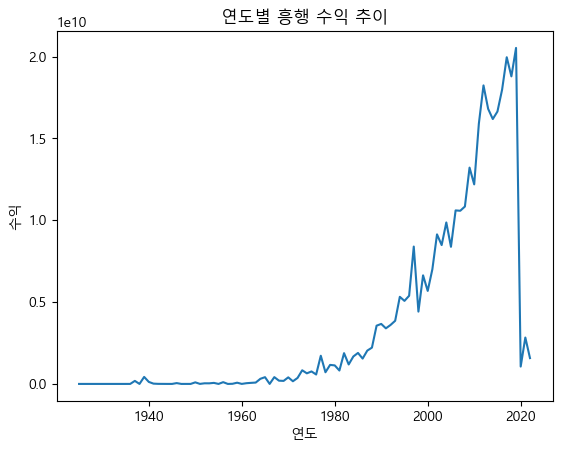

In [6]:
# 차트 제목과 축 이름 추가
plt.plot(df_year_ww)

plt.title('연도별 흥행 수익 추이')
plt.xlabel('연도')
plt.ylabel('수익')

plt.show()

## 범주 추가

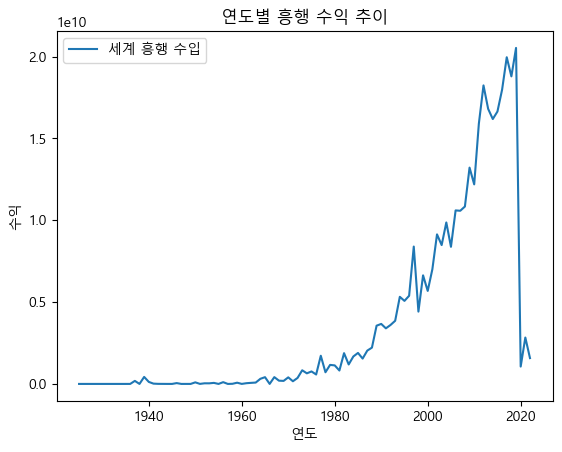

In [7]:
plt.plot(df_year_ww)

plt.title('연도별 흥행 수익 추이')
plt.xlabel('연도')
plt.ylabel('수익')

plt.legend(labels=['세계 흥행 수입'], loc='best')

plt.show()

## 차트 크기 및 x 축 데이터 밀집도 변경

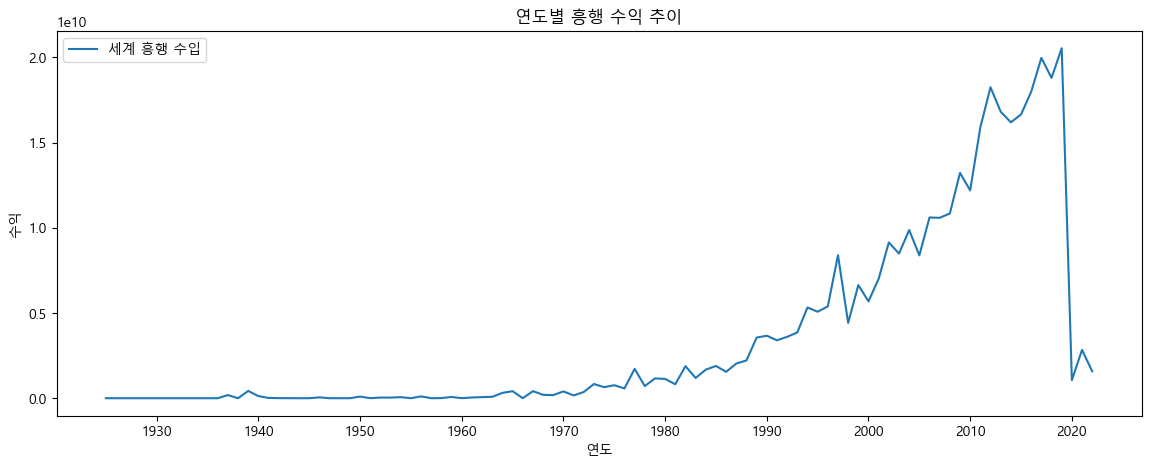

In [8]:
plt.figure(figsize=(14, 5))
plt.plot(df_year_ww)

plt.title('연도별 흥행 수익 추이')
plt.xlabel('연도')
plt.ylabel('수익')

plt.legend(labels=['세계 흥행 수입'], loc='best')
plt.xticks(range(1930, 2030, 10))

plt.show()

# 여러 그래프 그리기

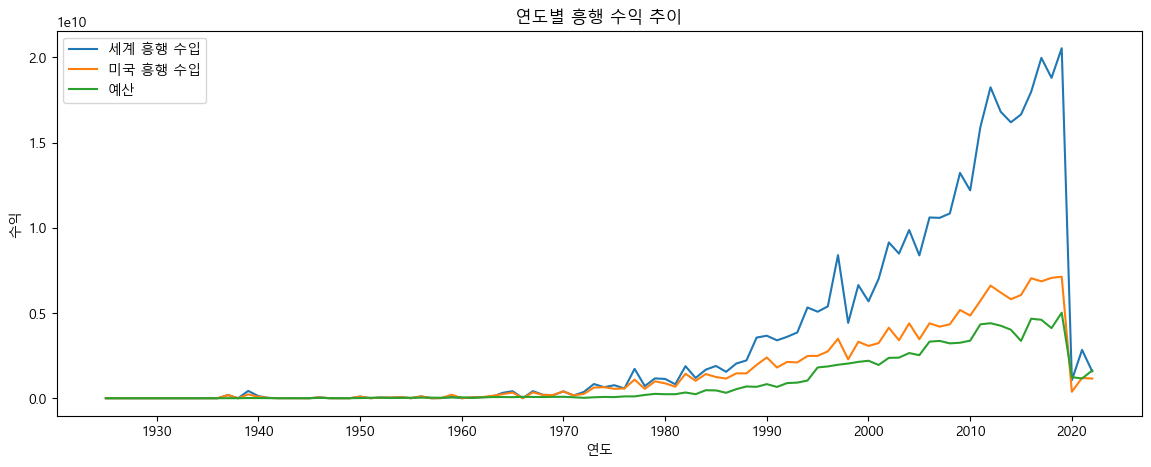

In [9]:
# 연도별 흥행수익
plt.figure(figsize=(14, 5))

plt.plot(df[['release_year','boxoffice_ww_gross']].groupby('release_year').sum())
plt.plot(df[['release_year','boxoffice_us_gross']].groupby('release_year').sum())
plt.plot(df[['release_year','budget']].groupby('release_year').sum())

plt.title('연도별 흥행 수익 추이')
plt.xlabel('연도')
plt.ylabel('수익')

plt.legend(labels=['세계 흥행 수입','미국 흥행 수입','예산'], loc='best')
plt.xticks(range(1930, 2030, 10))

plt.show()


# 서식 사용

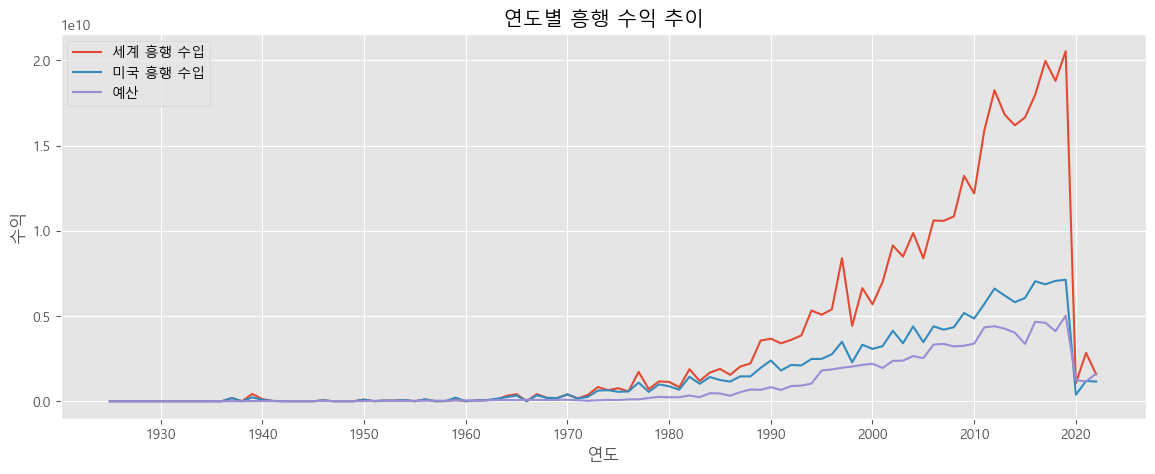

In [11]:
# 연도별 흥행수익
plt.figure(figsize=(14, 5))
plt.style.use('ggplot')

plt.plot(df[['release_year','boxoffice_ww_gross']].groupby('release_year').sum())
plt.plot(df[['release_year','boxoffice_us_gross']].groupby('release_year').sum())
plt.plot(df[['release_year','budget']].groupby('release_year').sum())

plt.title('연도별 흥행 수익 추이')
plt.xlabel('연도')
plt.ylabel('수익')

plt.legend(labels=['세계 흥행 수입','미국 흥행 수입','예산'], loc='best')
plt.xticks(range(1930, 2030, 10))

plt.show()

In [12]:
df

,movie_id,title,korean_title,release_year,running_time,boxoffice_ww_gross,boxoffice_us_gross,budget
0,1,Whiplash,위플래쉬,2014,107,33020729,13092000,3300000
1,2,Birdman: Or (The Unexpected Virtue of Ignorance),버드맨,2014,119,103215094,42335698,22000000
2,3,American Sniper,아메리칸 스나이퍼,2014,132,547426372,350126372,58800000
3,4,Boyhood,보이후드,2014,165,43237465,25359200,4000000
4,5,The Imitation Game,이미테이션 게임,2014,114,219979959,91121452,14000000
...,...,...,...,...,...,...,...,...
1917,13739,Bullet Train,불릿 트레인,2022,127,77347703,44947703,85900000
1918,13742,Black Panther: Wakanda Forever,블랙 팬서: 와칸다 포에버,2022,161,250000000,453829060,859208836
1919,13743,Everything Everywhere All at Once,에브리씽 에브리웨어 올 앳 원스,2022,129,143370485,77191785,14300000
1920,13744,Elvis,엘비스,2022,159,288670284,151040048,85000000


## 화면 분할

In [26]:
df_revenue_ratio = df[['release_year','boxoffice_ww_gross','budget']]
df_revenue_ratio

,release_year,boxoffice_ww_gross,budget
0,2014,33020729,3300000
1,2014,103215094,22000000
2,2014,547426372,58800000
3,2014,43237465,4000000
4,2014,219979959,14000000
...,...,...,...
1917,2022,77347703,85900000
1918,2022,250000000,859208836
1919,2022,143370485,14300000
1920,2022,288670284,85000000


In [49]:
import math

ratio = [round(x['boxoffice_ww_gross'] / x['budget'] * 100) for _, x in df_revenue_ratio.iterrows()]
df_revenue_ratio['revenue_ratio'] = ratio

C:\Users\gik_k\AppData\Local\Temp\ipykernel_18948\3248131121.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue_ratio['revenue_ratio'] = ratio


In [53]:
df_ratio = df_revenue_ratio.groupby('release_year').sum()

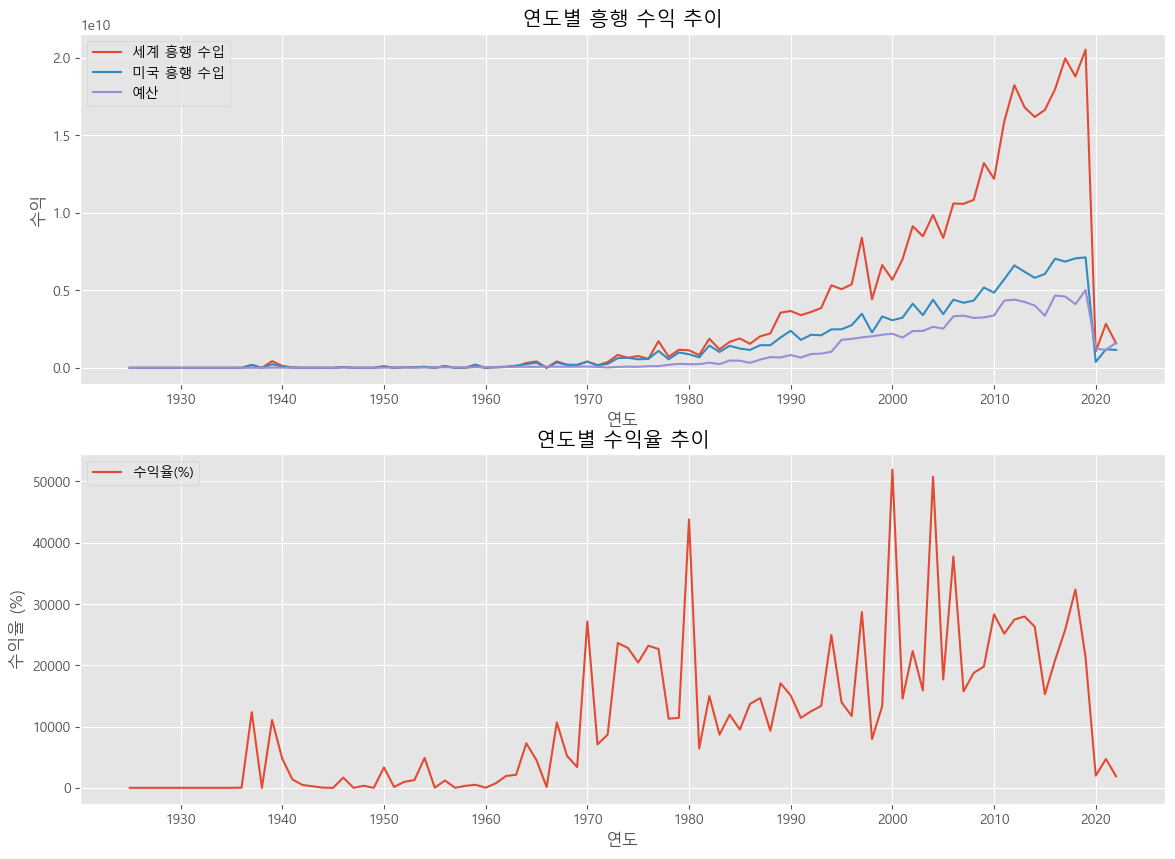

In [80]:
fig = plt.figure(figsize=(14, 10))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(df[['release_year','boxoffice_ww_gross']].groupby('release_year').sum())
ax1.plot(df[['release_year','boxoffice_us_gross']].groupby('release_year').sum())
ax1.plot(df[['release_year','budget']].groupby('release_year').sum())

ax2.plot(df_ratio['revenue_ratio'])

ax1.set_title('연도별 흥행 수익 추이')
ax1.set_xlabel('연도')
ax1.set_ylabel('수익')
ax1.set_xticks(range(1930, 2030, 10))
ax1.legend(labels=['세계 흥행 수입','미국 흥행 수입','예산'], loc='best')

ax2.set_title('연도별 수익율 추이')
ax2.set_xlabel('연도')
ax2.set_ylabel('수익율 (%)')
ax2.set_xticks(range(1930, 2030, 10))
ax2.legend(labels=['수익율(%)'], loc='upper left')

plt.show()

## 모양과 색상

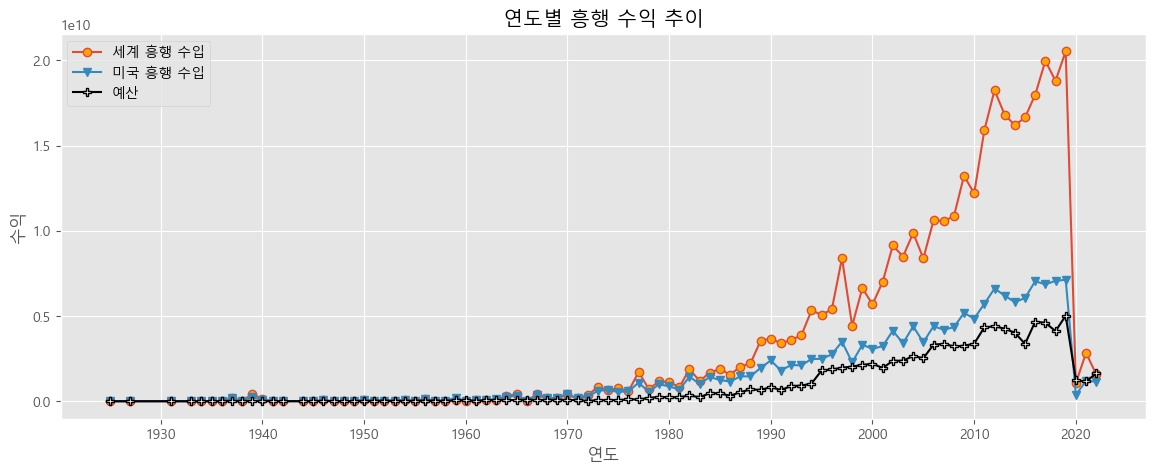

In [92]:
# 연도별 흥행수익
plt.figure(figsize=(14, 5))
plt.style.use('ggplot')

plt.plot(df[['release_year','boxoffice_ww_gross']].groupby('release_year').sum(), marker='o', markerfacecolor='orange')
plt.plot(df[['release_year','boxoffice_us_gross']].groupby('release_year').sum(), marker='v')
plt.plot(df[['release_year','budget']].groupby('release_year').sum(), marker='P', color='black', markerfacecolor='white')

plt.title('연도별 흥행 수익 추이')
plt.xlabel('연도')
plt.ylabel('수익')

plt.legend(labels=['세계 흥행 수입','미국 흥행 수입','예산'], loc='best')
plt.xticks(range(1930, 2030, 10))

plt.show()